<a href="https://colab.research.google.com/github/silverjin01/2020-2-AI/blob/master/code/14W_Fashion_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


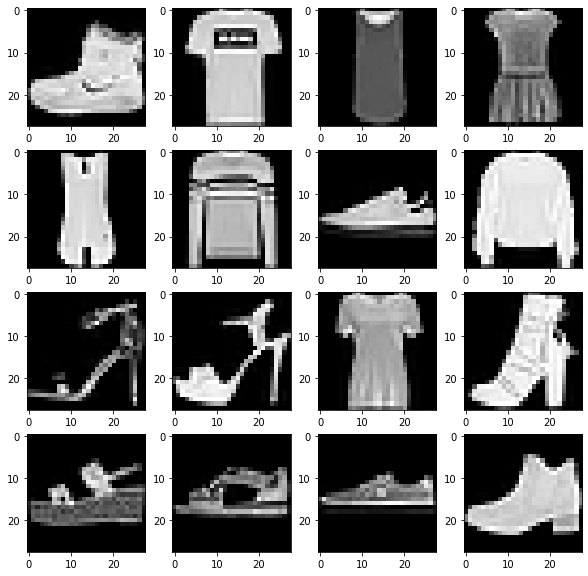

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [4]:
import matplotlib.pyplot as plt

# 전체 그래프의 크기를 width = 10, height = 10으로 지정합니다. 
plt.figure(figsize=(10, 10))
for c in range(16): 
  # 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다. 
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')

plt.show()

# 훈련 데이터이 1~16번째 까지의 라벨 프린트합니다. 
print(train_Y[:16])

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32), 
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(units=128, activation='relu'), 
    tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [6]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [7]:
istory = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 168s 119ms/step - loss: 0.4738 - accuracy: 0.8333 - val_loss: 0.3886 - val_accuracy: 0.8570
Epoch 2/10
1407/1407 [==============================] - 167s 119ms/step - loss: 0.3418 - accuracy: 0.8752 - val_loss: 0.3978 - val_accuracy: 0.8565
Epoch 3/10
1407/1407 [==============================] - 166s 118ms/step - loss: 0.2870 - accuracy: 0.8949 - val_loss: 0.3970 - val_accuracy: 0.8671
Epoch 4/10
1407/1407 [==============================] - 171s 122ms/step - loss: 0.2503 - accuracy: 0.9063 - val_loss: 0.3984 - val_accuracy: 0.8643
Epoch 5/10
1407/1407 [==============================] - 167s 119ms/step - loss: 0.2153 - accuracy: 0.9202 - val_loss: 0.4327 - val_accuracy: 0.8664
Epoch 6/10
1407/1407 [==============================] - 167s 118ms/step - loss: 0.1896 - accuracy: 0.9296 - val_loss: 0.4269 - val_accuracy: 0.8739
Epoch 7/10
1407/1407 [==============================] - 168s 119ms/step - loss: 0.1680 - accuracy: 0.9391 - val_

NameError: ignored

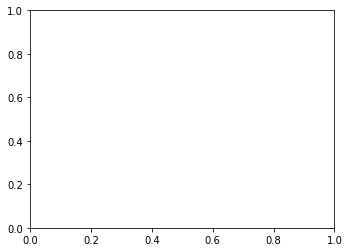

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.5302 - accuracy: 0.8059 - val_loss: 0.3563 - val_accuracy: 0.8683
Epoch 2/10
1407/1407 [==============================] - 46s 33ms/step - loss: 0.3550 - accuracy: 0.8725 - val_loss: 0.3184 - val_accuracy: 0.8824
Epoch 3/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.3137 - accuracy: 0.8856 - val_loss: 0.3067 - val_accuracy: 0.8875
Epoch 4/10
1407/1407 [==============================] - 47s 33ms/step - loss: 0.2865 - accuracy: 0.8956 - val_loss: 0.3140 - val_accuracy: 0.8819
Epoch 5/10
1407/1407 [==============================] - 48s 34ms/step - loss: 0.2644 - accuracy: 0.9043 - val_loss: 0.3122 - val_accuracy: 0.8883
Epoch 6/10
1407/1407 [==============================] - 47s 34ms/step - loss: 0.2511 - accuracy: 0.9083 - val_loss: 0.3134 - val_accuracy: 0.8919
Epoch 7/10
1407/1407 [==============================] - 49s 34ms/step - loss: 0.2319 - accuracy: 0.9146 - val_loss: 0.3072 -

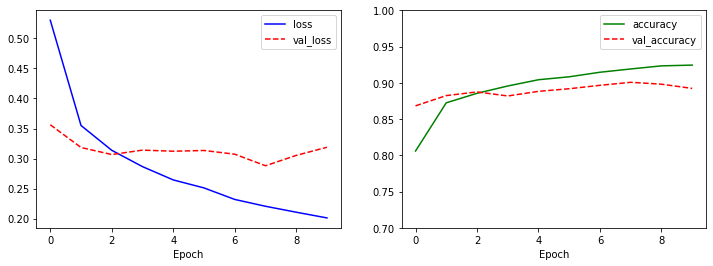

[0.3248230814933777, 0.890999972820282]

In [ ]:
# history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(rate=0.5), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),    
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),  
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')                           
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

NameError: ignored

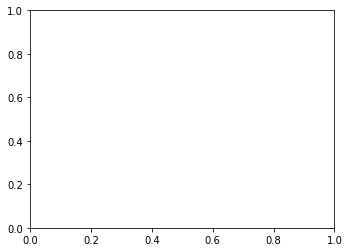

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)